In [1]:
import networkx as nx
import sympy as sp

sp.init_printing()

from index_reduction import IndexReduction, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
def pprint(exprs, heading="expressions"):
    print(heading)
    for expr in exprs:
        display(expr)

Equations


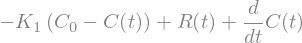

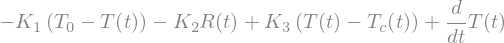

In [3]:
# Define the symbol for time
t = sp.symbols("t")

# Define symbols
K1 = sp.symbols("K_1")
K2 = sp.symbols("K_2")
K3 = sp.symbols("K_3")
K4 = sp.symbols("K_4")
C0 = sp.symbols("C_0")
T0 = sp.symbols("T_0")

# Define functions of time
C = sp.Function("C")(t)
T = sp.Function("T")(t)
R = sp.Function("R")(t)
Tc = sp.Function("T_c")(t)

u = sp.Function("u")(t)  # known

# knowns
knowns = [K1, K2, K3, K4, C0, T0, u]

# Define the derivatives of these functions with respect to time
Cdot = C.diff(t)
Tdot = T.diff(t)

# Define equations
eq0 = Cdot - K1 * (C0 - C) + R
eq1 = Tdot - K1 * (T0 - T) - K2 * R + K3 * (T - Tc)
eq2 = R - K3 * sp.exp(-K4 / T) * C
eq3 = C - u

# Equations list
eqs = [eq0, eq1, eq2, eq3]

pprint(eqs, "Equations")

In [4]:
ir = IndexReduction(t, eqs, knowns, notebook=True)

In [5]:
ir.x

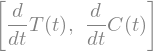

In [6]:
ir.x_dot

In [7]:
ir.y

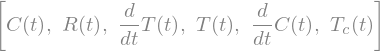

In [8]:
ir.X

In [9]:
ir.A

[4, None, None, 2, None, None]

In [10]:
ir.M

In [11]:
ir.N

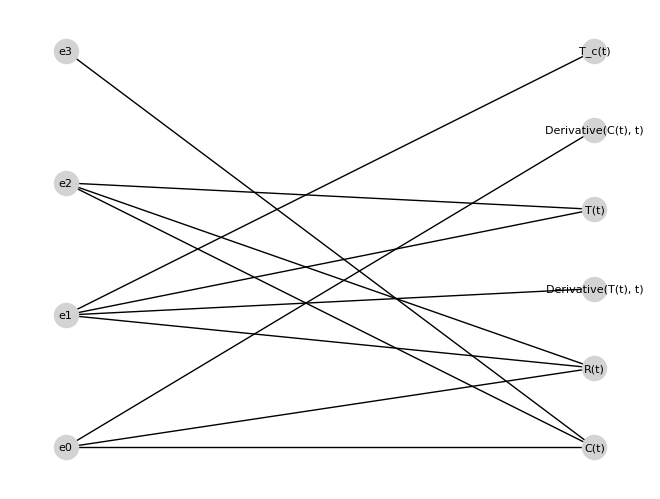

In [12]:
draw_graph(ir.G)

In [14]:
ir.pantelides()

# Panteides Algorithm Completed 

Total equations (before|after): 4|8
Total variables (before|after): 6|8


Variables 

[C(t), R(t), Derivative(T(t), t), T(t), Derivative(C(t), t), T_c(t), Derivative(R(t), t), Derivative(C(t), (t, 2))]


Equations 

-K_1*(C_0 - C(t)) + R(t) + Derivative(C(t), t)
-K_1*(T_0 - T(t)) - K_2*R(t) + K_3*(T(t) - T_c(t)) + Derivative(T(t), t)
-K_3*C(t)*exp(-K_4/T(t)) + R(t)
C(t) - u(t)
Derivative(C(t), t) - Derivative(u(t), t)
K_1*Derivative(C(t), t) + Derivative(C(t), (t, 2)) + Derivative(R(t), t)
-K_3*K_4*C(t)*exp(-K_4/T(t))*Derivative(T(t), t)/T(t)**2 - K_3*exp(-K_4/T(t))*Derivative(C(t), t) + Derivative(R(t), t)
Derivative(C(t), (t, 2)) - Derivative(u(t), (t, 2))


# Variable assignments
Variable C(t) is assigned to -> 
Variable R(t) is assigned to -> e2
Variable Derivative(T(t), t) is assigned to -> e6
Variable T(t) is assigned to -> 
Variable Derivative(C(t), t) is assigned to -> e0
Variable T_c(t) is assigned to -> e1
Variable Derivative(R(t), t) is assi

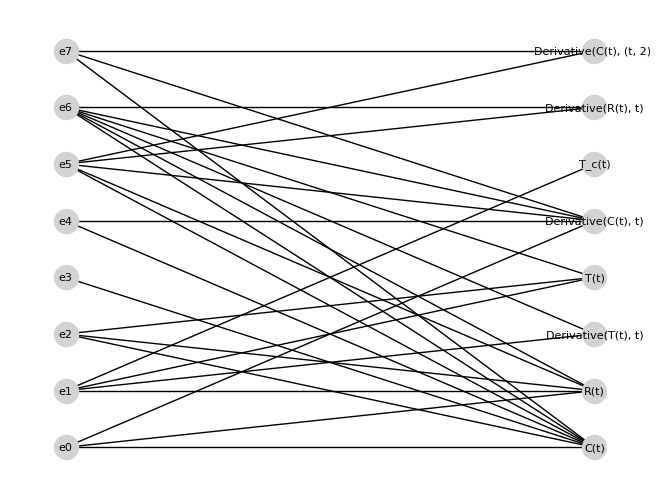

In [15]:
draw_graph(ir.G)